In [1]:
import mysql.connector
import pandas as pd
import pandas.io.sql as psql
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import numpy as np

In [2]:
class Tinder:
    def __init__(self):
        self._cnx = mysql.connector.connect(user='xxx', password='xxx', database='tinder')
        self._cursor = self._cnx.cursor()

In [3]:
t = Tinder()

In [4]:
data = psql.read_sql("select * from users", t._cnx)

[Text(0,0,'Zurich'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Rome'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Berlin'),
 Text(0,0,'Dubai'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Oslo'),
 Text(0,0,'Milan'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Madrid'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Sydney'),
 Text(0,0,'London'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Chicago'),
 Text(0,0,'New York'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Vienna'),
 Text(0,0,'Toronto'),
 Text(0,0,'Geneva'),
 Text(0,0,'Brussels'),
 Text(0,0,'Prague'),
 Text(0,0,'Paris'),
 Text(0,0,'Dublin'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Singapore'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Moscow'),
 Text(0,0,'Santiago'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Seoul'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Delhi'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Bogota')]

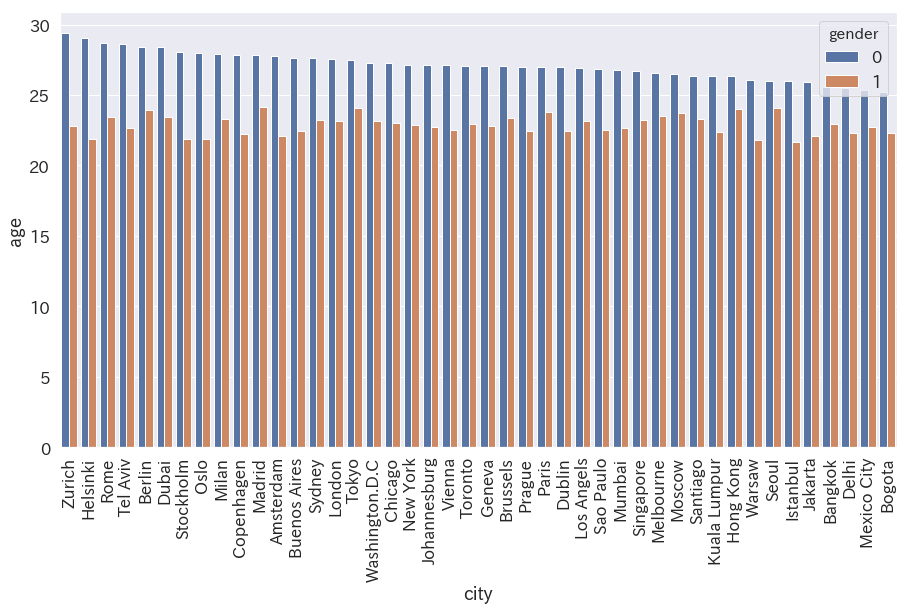

In [5]:
df_age = data[data['age'] <= 60]
df_age = df_age.groupby(['city', 'gender']).mean()
df_age = df_age.sort_values(['age'], ascending=False)
df_age = df_age.reset_index()
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='age', hue='gender', data=df_age)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


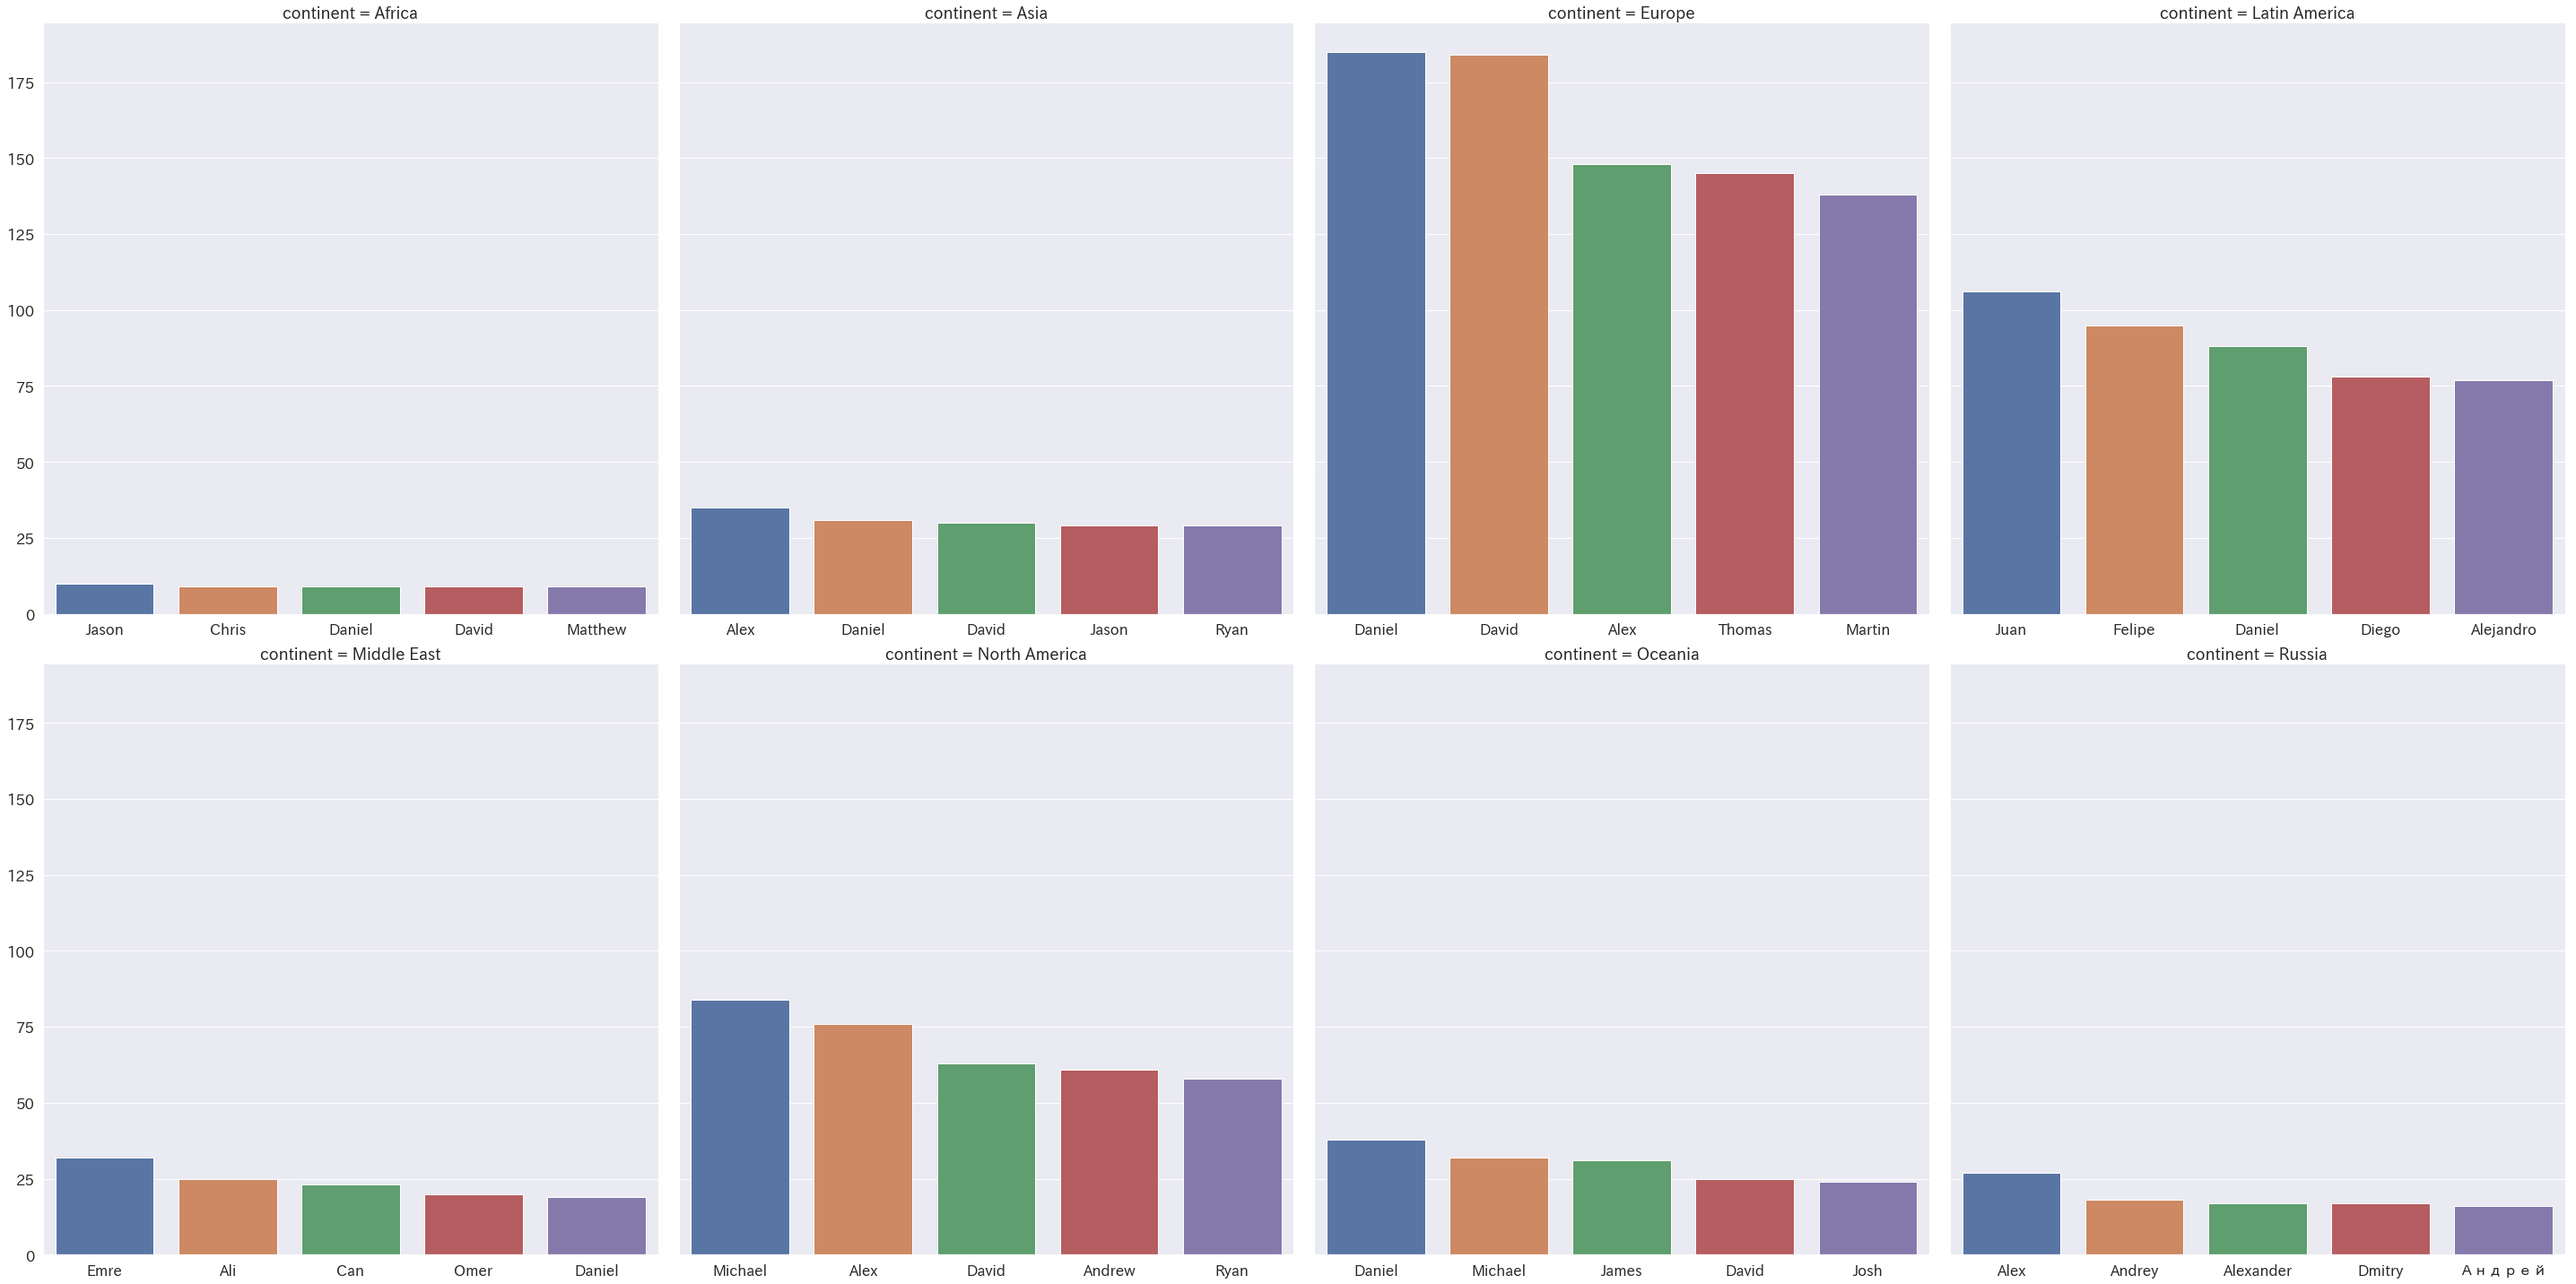

In [6]:
df_name_male = data[data['gender'] == 0]
df_name_male = df_name_male.groupby(['continent', 'name'])[['continent', 'name']].size()
df_name_male = df_name_male.reset_index().sort_values(["continent", 0], ascending=[True, False])
df_name_male = df_name_male.rename(columns={0: 'count_name'})
g = sns.FacetGrid(df_name_male, col="continent", size=10, sharex=False, col_wrap=4)

def limit_barplot(data, **kws):
    sns.barplot(data.name[0:5], data.count_name[0:5])

g.map_dataframe(limit_barplot)

/home/iwata/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


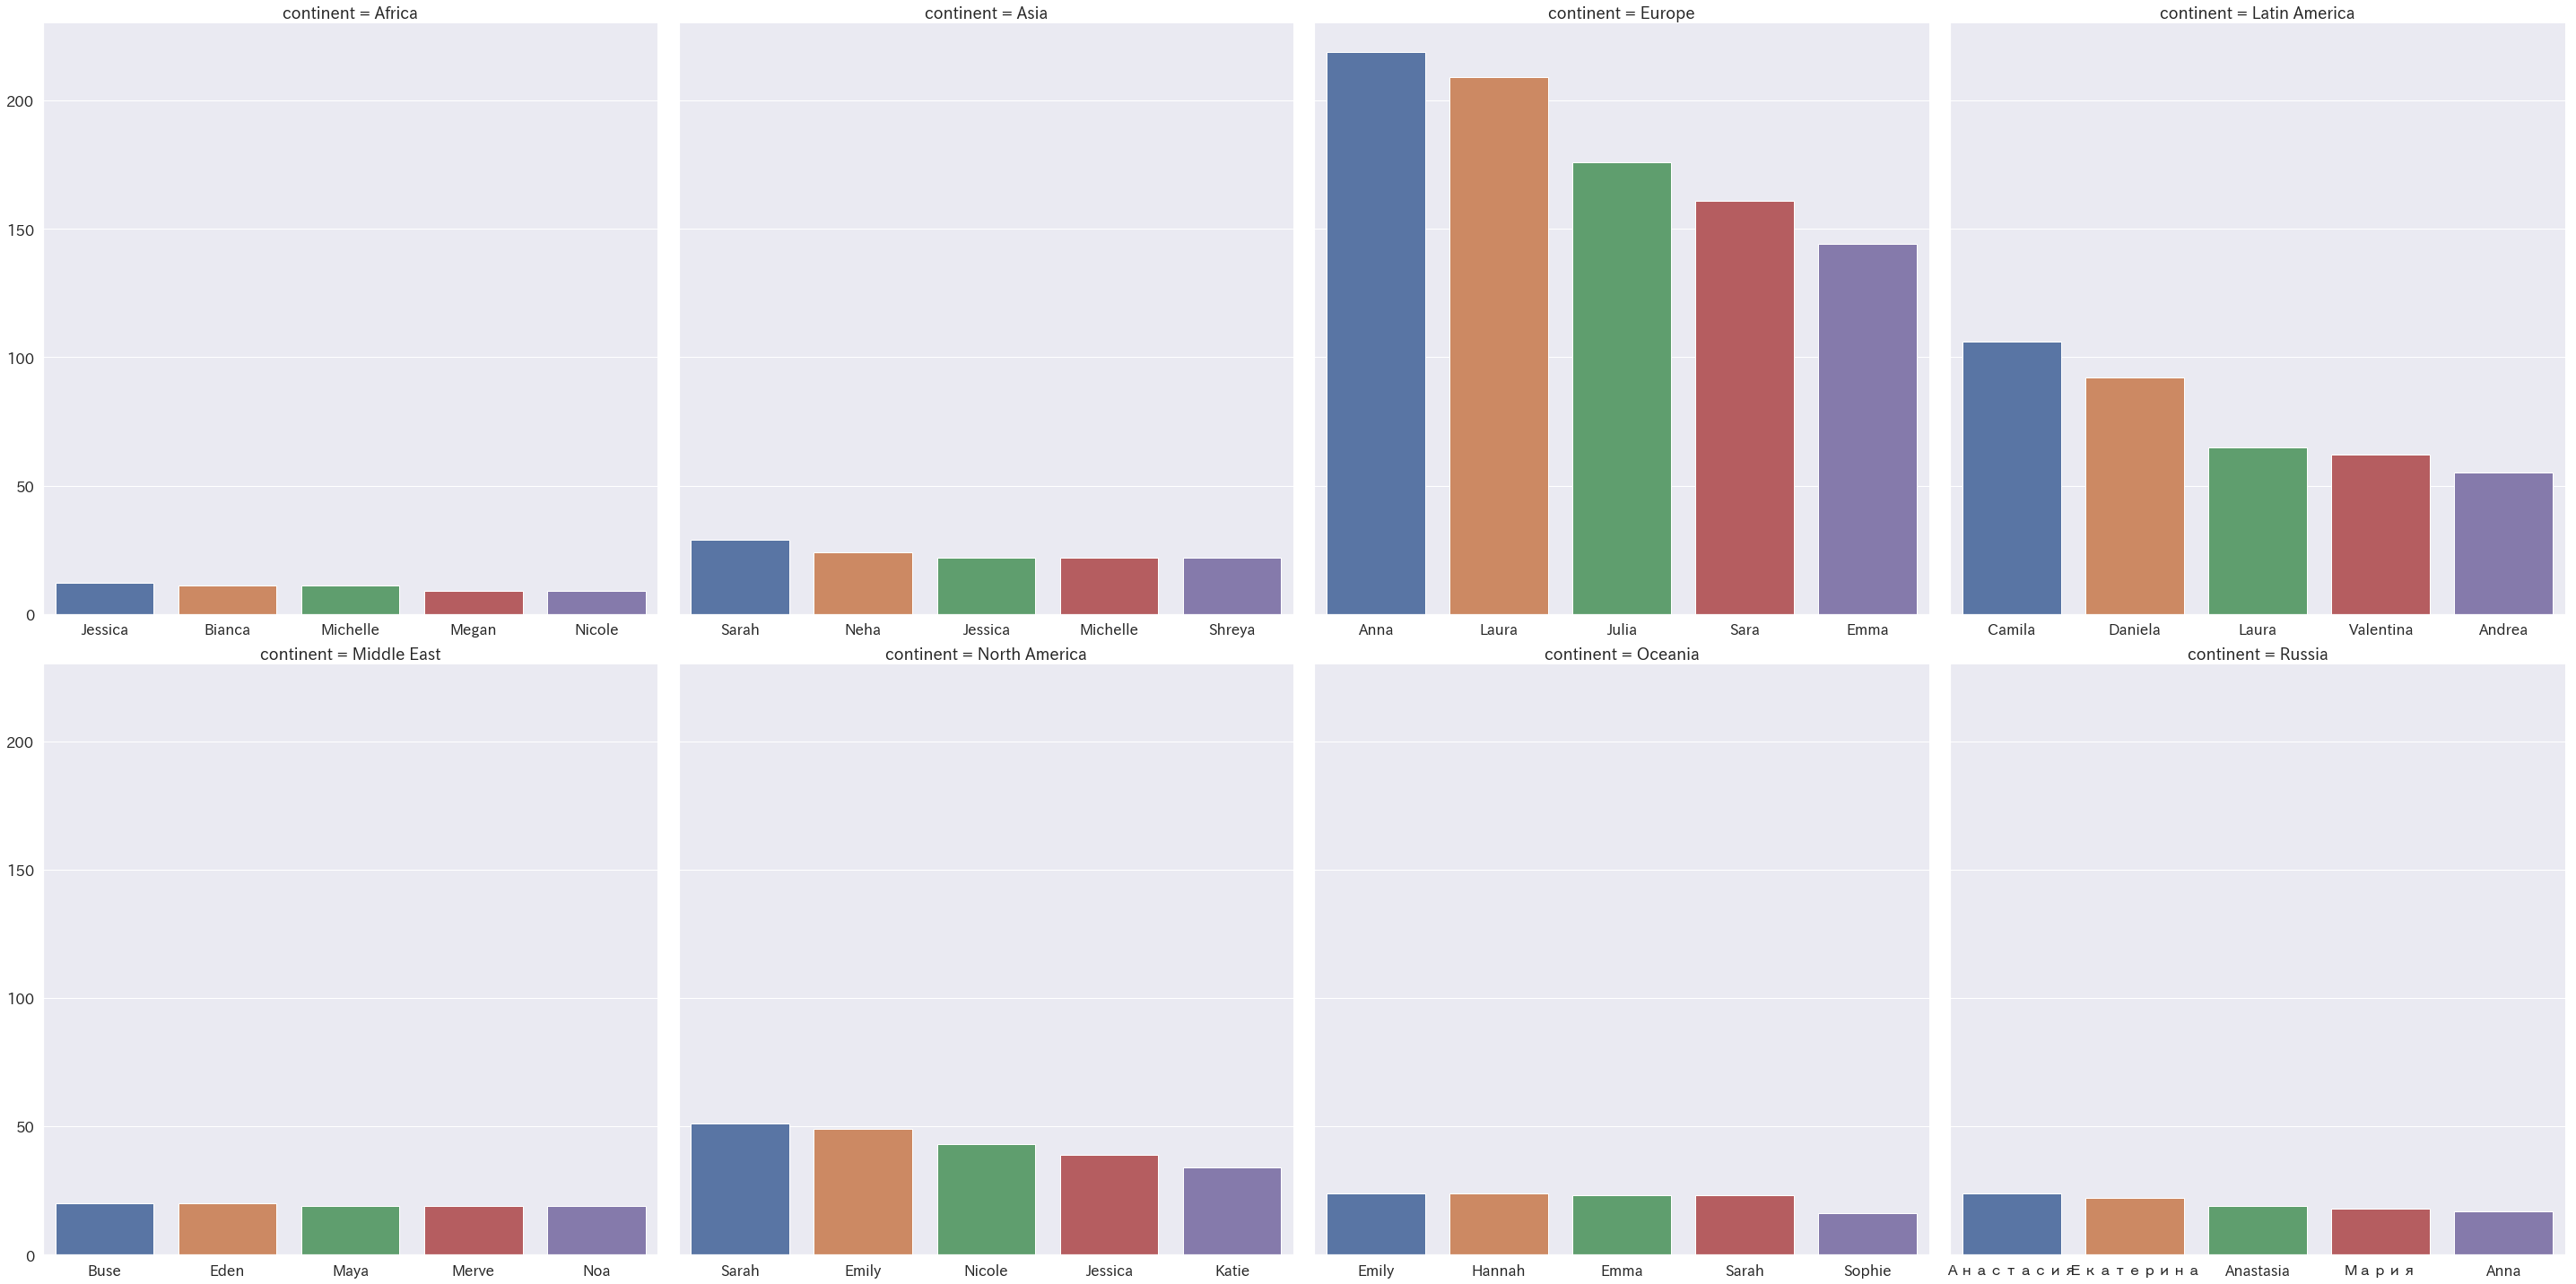

In [7]:
df_name_female = data[data['gender'] == 1]
df_name_female = df_name_female.groupby(['continent', 'name'])[['continent', 'name']].size()
df_name_female = df_name_female.reset_index().sort_values(["continent", 0], ascending=[True, False])
df_name_female = df_name_female.rename(columns={0: 'count_name'})
g = sns.FacetGrid(df_name_female, col="continent", size=10, sharex=False, col_wrap=4)

def limit_barplot(data, **kws):
    sns.barplot(data.name[0:5], data.count_name[0:5])

g.map_dataframe(limit_barplot)

[Text(0,0,'Waseda University'),
 Text(0,0,'明治大学'),
 Text(0,0,'立教大学'),
 Text(0,0,'早稲田大学'),
 Text(0,0,'慶應義塾大学'),
 Text(0,0,'上智大学'),
 Text(0,0,'早稲田大学\u3000Waseda University'),
 Text(0,0,'Aoyama Gakuin University'),
 Text(0,0,'Kyoto University'),
 Text(0,0,'The University of Tokyo / UTok')]

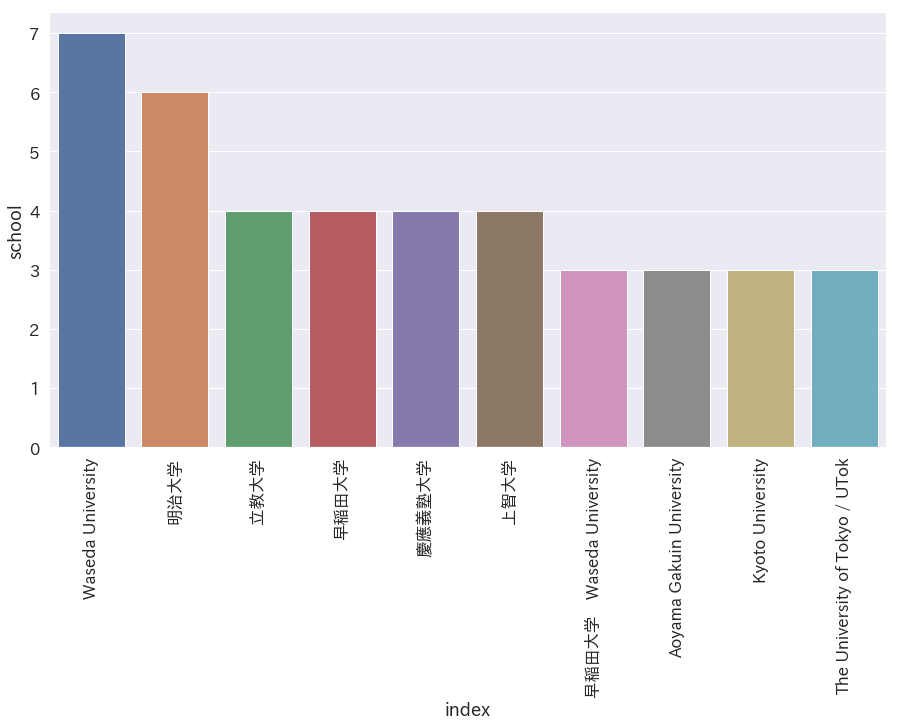

In [8]:
df_school_tokyo = data[(data['city'] == "Tokyo") & (data['school'] != "")]
df_school_tokyo = df_school_tokyo['school'].value_counts()
df_school_tokyo = df_school_tokyo.reset_index()
df_school_tokyo = df_school_tokyo[0:10]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='school', data=df_school_tokyo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Washington.D.C'),
 Text(0,0,'Chicago'),
 Text(0,0,'Oslo'),
 Text(0,0,'Dublin'),
 Text(0,0,'New York'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Toronto'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Prague'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Singapore'),
 Text(0,0,'Vienna'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Rome'),
 Text(0,0,'Sydney'),
 Text(0,0,'London'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Brussels'),
 Text(0,0,'Geneva'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Madrid'),
 Text(0,0,'Milan'),
 Text(0,0,'Berlin'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Delhi'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Bogota'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Paris'),
 Text(0,0,'Zurich'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Santiago'),
 Text(0,0,'Moscow'),
 Text(0,0,'Dubai'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Seoul')]

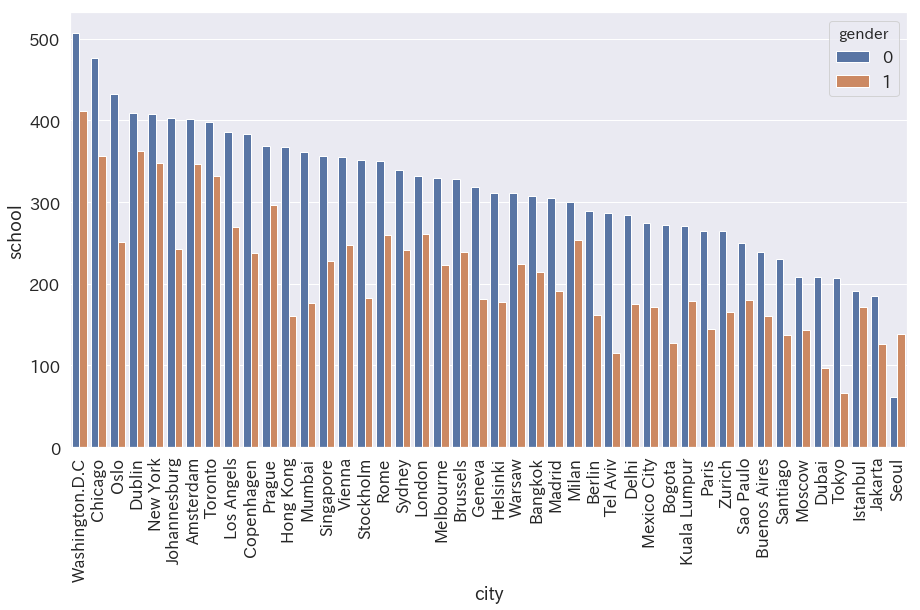

In [9]:
df_school = data[data['school'] != ""]
df_school = df_school.groupby(['city', 'gender'])['school'].size()
df_school = df_school.reset_index().sort_values("school", ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='school', hue='gender', data=df_school)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Chicago'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Los Angels'),
 Text(0,0,'New York'),
 Text(0,0,'Sydney'),
 Text(0,0,'Mumbai'),
 Text(0,0,'London'),
 Text(0,0,'Toronto'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Oslo'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Dublin'),
 Text(0,0,'Delhi'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Berlin'),
 Text(0,0,'Brussels'),
 Text(0,0,'Madrid'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Paris'),
 Text(0,0,'Zurich'),
 Text(0,0,'Milan'),
 Text(0,0,'Dubai'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Vienna'),
 Text(0,0,'Prague'),
 Text(0,0,'Singapore'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Moscow'),
 Text(0,0,'Rome'),
 Text(0,0,'Geneva'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Bogota'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Santiago'),
 Text(0,0,'Seoul')]

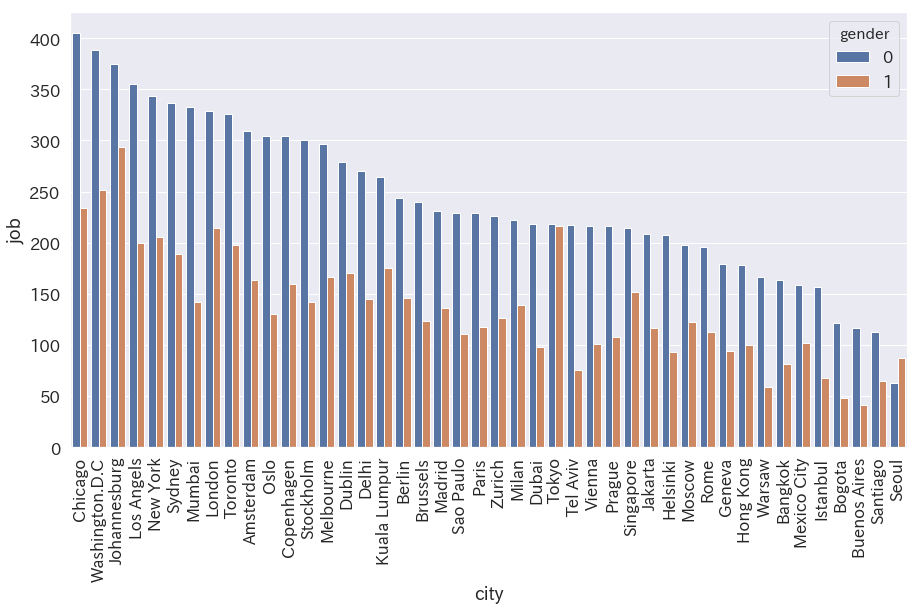

In [10]:
df_job = data[data['job'] != ""]
df_job = df_job.groupby(['city', 'gender'])['job'].size()
df_job = df_job.reset_index().sort_values("job", ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='job', hue="gender", data=df_job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Student'),
 Text(0,0,'Teacher'),
 Text(0,0,'Designer'),
 Text(0,0,'Manager'),
 Text(0,0,'Consultant')]

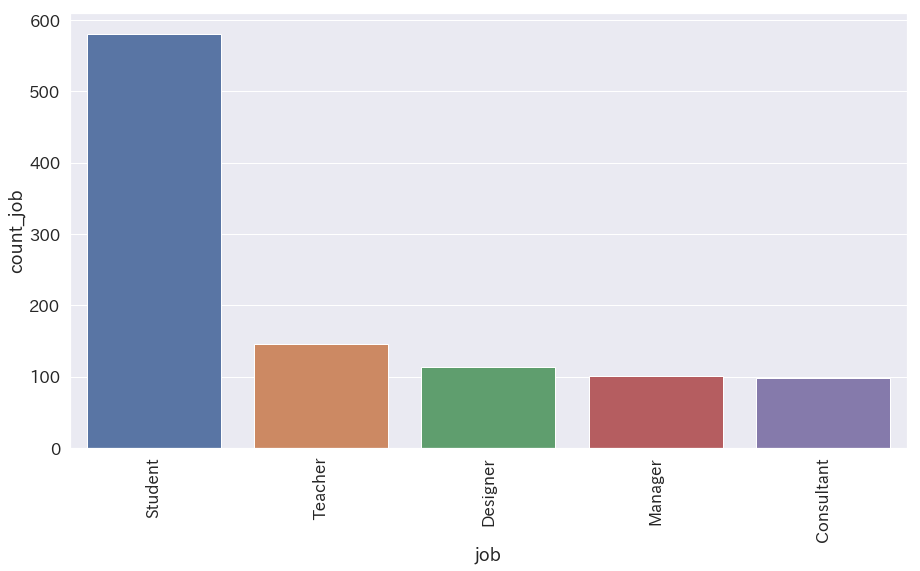

In [11]:
df_job_content = data[((data['job'] != ""))]
df_job_content = df_job_content.groupby(['job']).size()
df_job_content = df_job_content.reset_index().sort_values(0, ascending=False)
df_job_content = df_job_content[0:5]
df_job_content = df_job_content.rename(columns={0: 'count_job'})
plt.figure(figsize=(15,8))
ax = sns.barplot(x="job", y="count_job", data=df_job_content)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'会社員'),
 Text(0,0,'大学生'),
 Text(0,0,'学生'),
 Text(0,0,'Student'),
 Text(0,0,'個人事業主'),
 Text(0,0,'専門職'),
 Text(0,0,'フォトグラファー'),
 Text(0,0,'代表'),
 Text(0,0,'IT')]

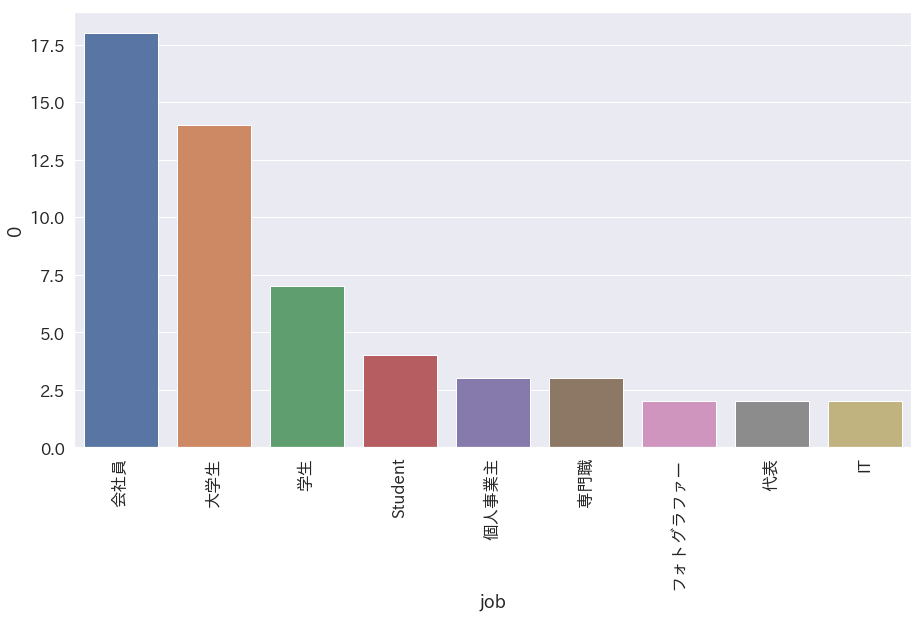

In [12]:
test = data[(data['city'] == "Tokyo") & (data['job'] != "") & (data['gender'] == 0)]
test = test.groupby(['job']).size()
test = test.reset_index().sort_values(0, ascending=False)
test = test[0:9]
plt.figure(figsize=(15,8))
ax = sns.barplot(x="job", y=0, data=test)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'大学生'),
 Text(0,0,'学生'),
 Text(0,0,'OL'),
 Text(0,0,'会社員'),
 Text(0,0,'事務'),
 Text(0,0,'社会人'),
 Text(0,0,'看護学生'),
 Text(0,0,'保育士'),
 Text(0,0,'デザイナー')]

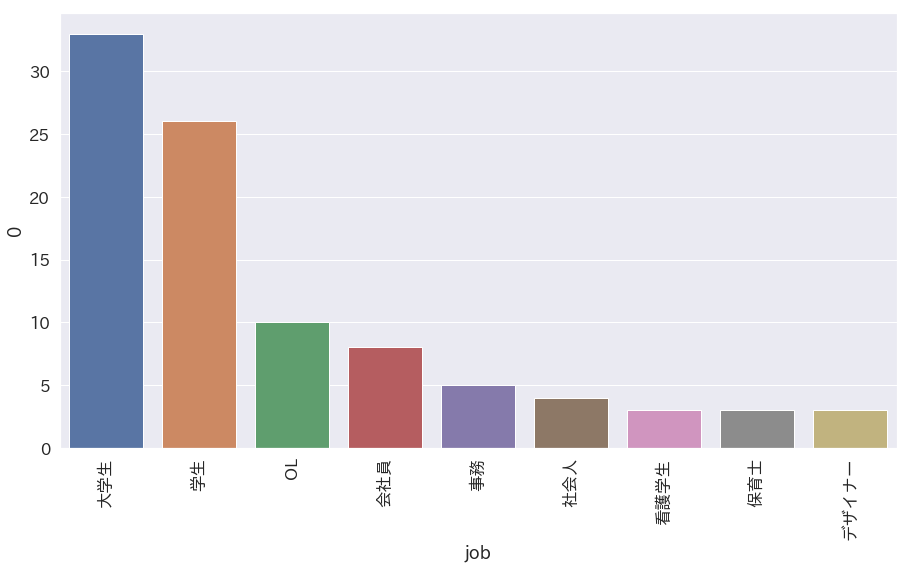

In [13]:
df_job_content_tokyo = data[(data['city'] == "Tokyo") & (data['job'] != "") & (data['gender'] == 1)]
df_job_content_tokyo = df_job_content_tokyo.groupby(['job']).size()
df_job_content_tokyo = df_job_content_tokyo.reset_index().sort_values(0, ascending=False)
df_job_content_tokyo = df_job_content_tokyo[0:9]
plt.figure(figsize=(15,8))
ax = sns.barplot(x="job", y=0, data=df_job_content_tokyo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Oslo'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'New York'),
 Text(0,0,'Chicago'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Delhi'),
 Text(0,0,'London'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Toronto'),
 Text(0,0,'Dublin'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Sydney'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Brussels'),
 Text(0,0,'Prague'),
 Text(0,0,'Rome'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Berlin'),
 Text(0,0,'Paris'),
 Text(0,0,'Geneva'),
 Text(0,0,'Madrid'),
 Text(0,0,'Dubai'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Milan'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Vienna'),
 Text(0,0,'Zurich'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Singapore'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Moscow'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Bogota'),
 Text(0,0,'Santiago'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Seoul')]

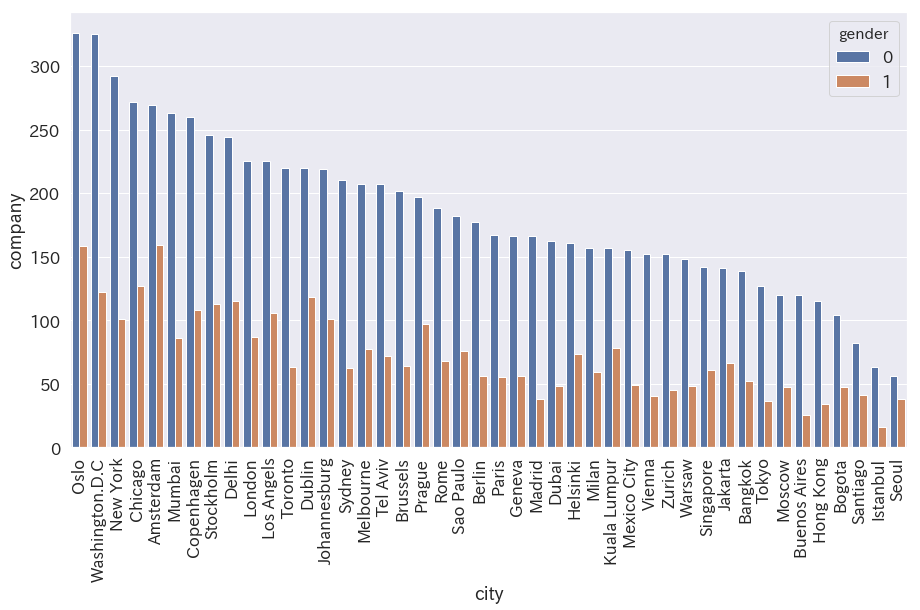

In [14]:
df_company = data[data['company'] != ""]
df_company = df_company.groupby(['city', 'gender'])['company'].size()
df_company = df_company.reset_index().sort_values("company", ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='company', hue="gender", data=df_company)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Student'),
 Text(0,0,'Self-Employed'),
 Text(0,0,'Facebook'),
 Text(0,0,'Accenture'),
 Text(0,0,'Deloitte'),
 Text(0,0,'Starbucks'),
 Text(0,0,'EY'),
 Text(0,0,'Emirates'),
 Text(0,0,'Freelancer'),
 Text(0,0,'Google')]

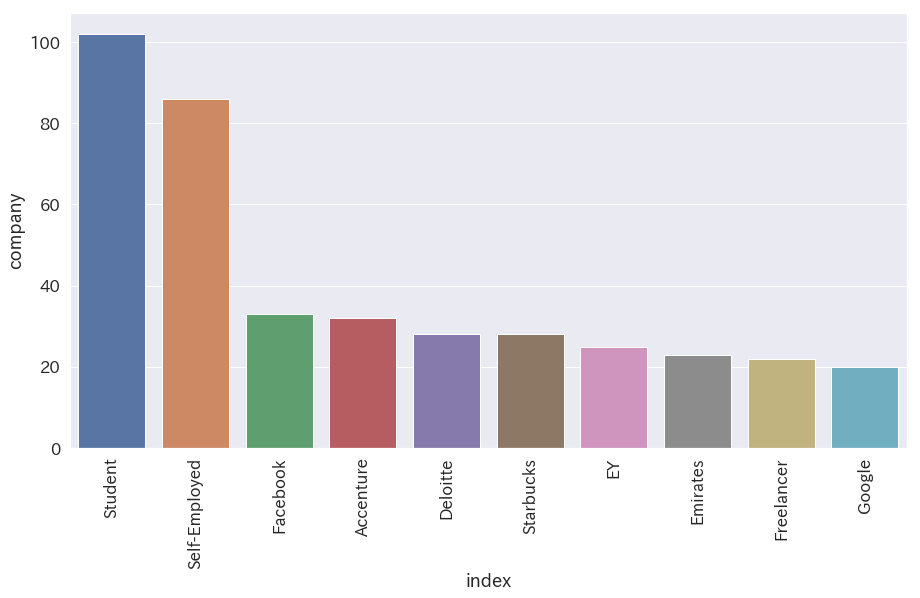

In [15]:
df_company_content = data[data['company'] != ""]
df_company_content = df_company_content['company'].value_counts()
df_company_content = df_company_content.reset_index()
df_company_content = df_company_content[0:10]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='company', data=df_company_content)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'広告代理店'),
 Text(0,0,'都内'),
 Text(0,0,'東京'),
 Text(0,0,'横浜'),
 Text(0,0,'エステサロン'),
 Text(0,0,'Tokyo Disney Resort'),
 Text(0,0,'U.S. Navy'),
 Text(0,0,'表参道'),
 Text(0,0,'Student'),
 Text(0,0,'IT')]

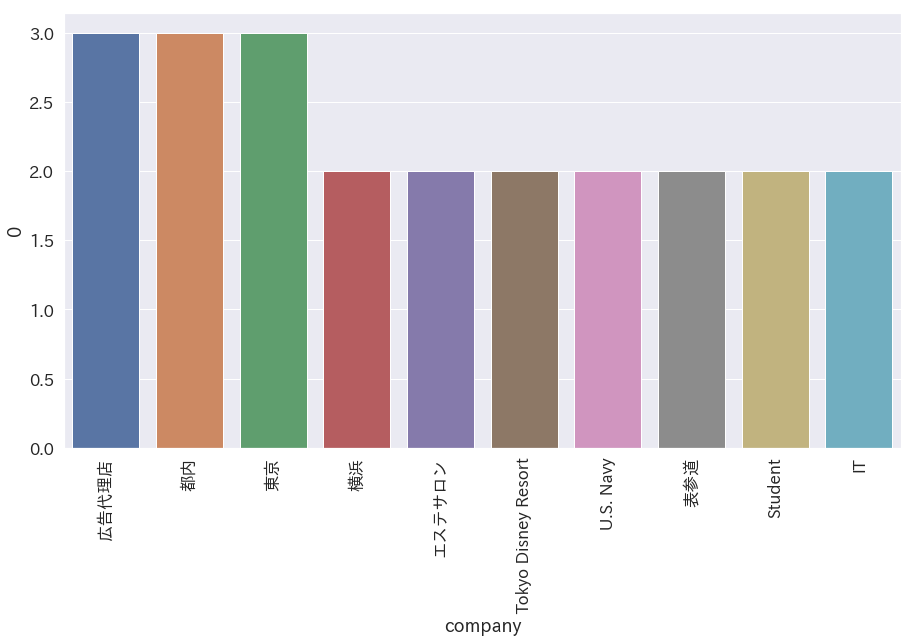

In [16]:
df_company_content_tokyo = data[(data['city'] == "Tokyo") & (data['company'] != "")]
df_company_content_tokyo = df_company_content_tokyo.groupby(['company']).size()
df_company_content_tokyo = df_company_content_tokyo.reset_index().sort_values(0, ascending=False)
df_company_content_tokyo = df_company_content_tokyo[0:10]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='company', y=0, data=df_company_content_tokyo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [21]:
df_bio = data
df_bio["bio"] = data["bio"].str.replace('?', '')
df_bio["bio"] = df_bio["bio"].str.replace('\n', '')
#city, bioを抽出する
bio_columns = df_bio.columns[df_bio.columns.str.contains('^city|gender|bio')]
df_len = pd.DataFrame(columns=["city", "gender", "bio", "len_bio"])
#1行毎取り出す
for i, row in df_bio[bio_columns].iterrows():
    list_append = []
    list_append.append(row["city"])
    list_append.append(row["gender"])
    list_append.append(row["bio"])
    list_append.append(len(row["bio"]))
    df_append = pd.DataFrame([list_append], columns=["city", "gender", "bio", "len_bio"])
    df_len = df_len.append(df_append)

[Text(0,0,'Washington.D.C'),
 Text(0,0,'Chicago'),
 Text(0,0,'Los Angels'),
 Text(0,0,'London'),
 Text(0,0,'Toronto'),
 Text(0,0,'New York'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Sydney'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Singapore'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Berlin'),
 Text(0,0,'Dublin'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Delhi'),
 Text(0,0,'Madrid'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Brussels'),
 Text(0,0,'Vienna'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Paris'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Zurich'),
 Text(0,0,'Geneva'),
 Text(0,0,'Prague'),
 Text(0,0,'Oslo'),
 Text(0,0,'Rome'),
 Text(0,0,'Dubai'),
 Text(0,0,'Milan'),
 Text(0,0,'Santiago'),
 Text(0,0,'Moscow'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Bogota'),
 Text(0,0,'Seoul'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Istanbul')]

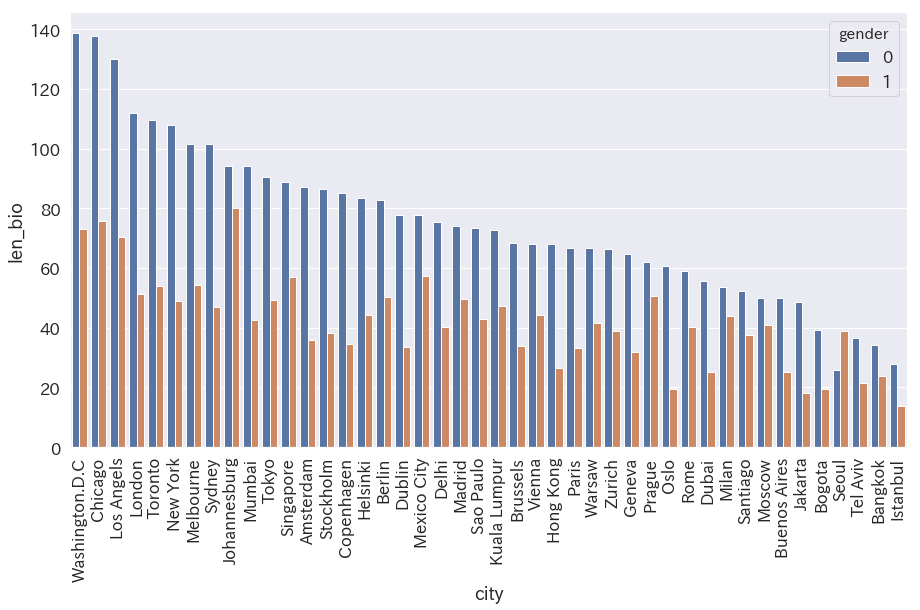

In [22]:
df_len_bio = df_len
df_len_bio[["len_bio"]] = df_len[["len_bio"]].astype(int)
df_len_bio = df_len_bio.groupby(['city', 'gender'])['len_bio'].mean()
df_len_bio = df_len_bio.reset_index().sort_values('len_bio', ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='len_bio', hue='gender', data=df_len_bio)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Los Angels'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Chicago'),
 Text(0,0,'New York'),
 Text(0,0,'London'),
 Text(0,0,'Toronto'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Sydney'),
 Text(0,0,'Singapore'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Berlin'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Seoul'),
 Text(0,0,'Dublin'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Paris'),
 Text(0,0,'Madrid'),
 Text(0,0,'Vienna'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Brussels'),
 Text(0,0,'Oslo'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Zurich'),
 Text(0,0,'Santiago'),
 Text(0,0,'Delhi'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Geneva'),
 Text(0,0,'Dubai'),
 Text(0,0,'Prague'),
 Text(0,0,'Moscow'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Rome'),
 Text(0,0,'Milan'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Bogota')]

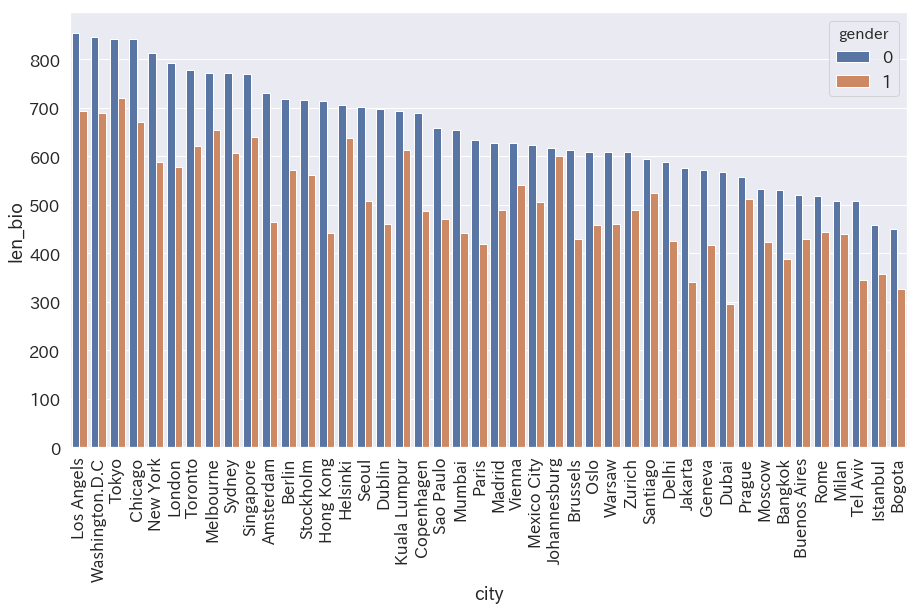

In [23]:
df_len_bio_exist = df_len[df_len["len_bio"] != 0]
df_len_bio_exist = df_len_bio_exist.groupby(['city', 'gender'])["len_bio"].size()
df_len_bio_exist = df_len_bio_exist.reset_index().sort_values("len_bio", ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='len_bio', hue="gender", data=df_len_bio_exist)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [24]:
#id, photoカラムのみ抽出
photo_columns = data.columns[data.columns.str.contains('city|gender|photo')]
df_photo = pd.DataFrame(columns=["city", "gender", "num_photo", "photo1", "photo2", "photo3", "photo4", "photo5", "photo6", "photo7", "photo8", "photo9", "photo10"])
#1行毎取り出す
for index_org, row in data[photo_columns].iterrows():
    #空白、nullを取り除く
    removed_space_and_null = [x for x in row if x != ""]
    #元のリストの順序を保持する
    update_photos = removed_space_and_null
    update_photos.insert(2, len(removed_space_and_null[2:]))
    #update_photosを""でパディング
    update_photos[len(update_photos):13] = [""] * (13 - len(update_photos))
    df_append = pd.DataFrame([update_photos], columns=["city", "gender", "num_photo", "photo1", "photo2", "photo3", "photo4", "photo5", "photo6", "photo7", "photo8", "photo9", "photo10"])
    df_photo = df_photo.append(df_append)

[Text(0,0,'Washington.D.C'),
 Text(0,0,'Chicago'),
 Text(0,0,'Los Angels'),
 Text(0,0,'New York'),
 Text(0,0,'London'),
 Text(0,0,'Dublin'),
 Text(0,0,'Toronto'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Sydney'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Rome'),
 Text(0,0,'Milan'),
 Text(0,0,'Oslo'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Brussels'),
 Text(0,0,'Zurich'),
 Text(0,0,'Berlin'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Madrid'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Vienna'),
 Text(0,0,'Prague'),
 Text(0,0,'Santiago'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Paris'),
 Text(0,0,'Bogota'),
 Text(0,0,'Singapore'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Dubai'),
 Text(0,0,'Geneva'),
 Text(0,0,'Delhi'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Moscow'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Seoul')]

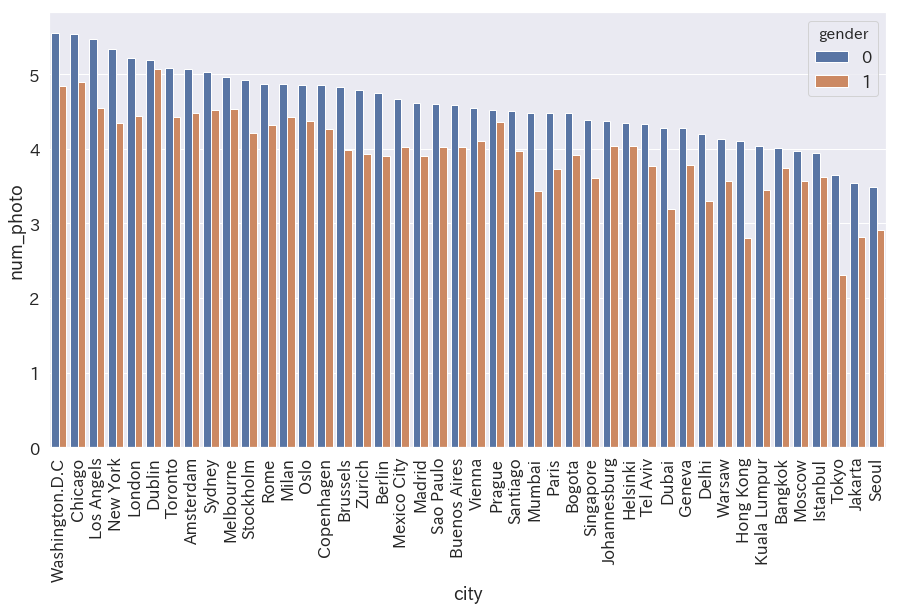

In [25]:
df_photo[["num_photo"]] = df_photo[["num_photo"]].astype(int)
df_num_photo = df_photo.groupby(['city','gender'])['num_photo'].mean()
df_num_photo = df_num_photo.reset_index().sort_values('num_photo', ascending=False)
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='num_photo', hue="gender", data=df_num_photo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Los Angels'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Prague'),
 Text(0,0,'Madrid'),
 Text(0,0,'Santiago'),
 Text(0,0,'New York'),
 Text(0,0,'Toronto'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Chicago'),
 Text(0,0,'Sydney'),
 Text(0,0,'Milan'),
 Text(0,0,'Rome'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Bogota'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Berlin'),
 Text(0,0,'Dublin'),
 Text(0,0,'Oslo'),
 Text(0,0,'London'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Singapore'),
 Text(0,0,'Brussels'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Vienna'),
 Text(0,0,'Paris'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Moscow'),
 Text(0,0,'Zurich'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Geneva'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Delhi'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Dubai'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Seoul')]

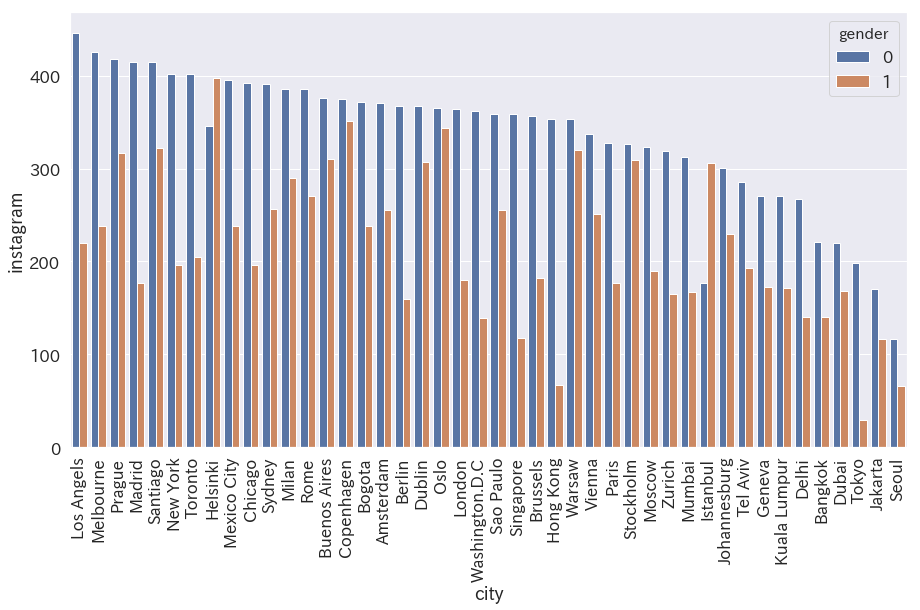

In [26]:
df_instagram = data[data['instagram'].notnull()]
df_instagram = df_instagram.groupby(['city','gender'])['instagram'].size()
df_instagram = df_instagram.reset_index().sort_values(["instagram", "city"], ascending=[False, True])
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='instagram', hue="gender", data=df_instagram)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Warsaw'),
 Text(0,0,'Chicago'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Madrid'),
 Text(0,0,'Dublin'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Prague'),
 Text(0,0,'Toronto'),
 Text(0,0,'Vienna'),
 Text(0,0,'Berlin'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Singapore'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Sydney'),
 Text(0,0,'Geneva'),
 Text(0,0,'London'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Paris'),
 Text(0,0,'Brussels'),
 Text(0,0,'Oslo'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Istanbul'),
 Text(0,0,'New York'),
 Text(0,0,'Rome'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Milan'),
 Text(0,0,'Santiago'),
 Text(0,0,'Zurich'),
 Text(0,0,'Bogota'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Dubai'),
 Text(0,0,'Moscow'),
 Text(0,0,'Seoul'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Delhi'),
 Text(0,0,'Mumbai')]

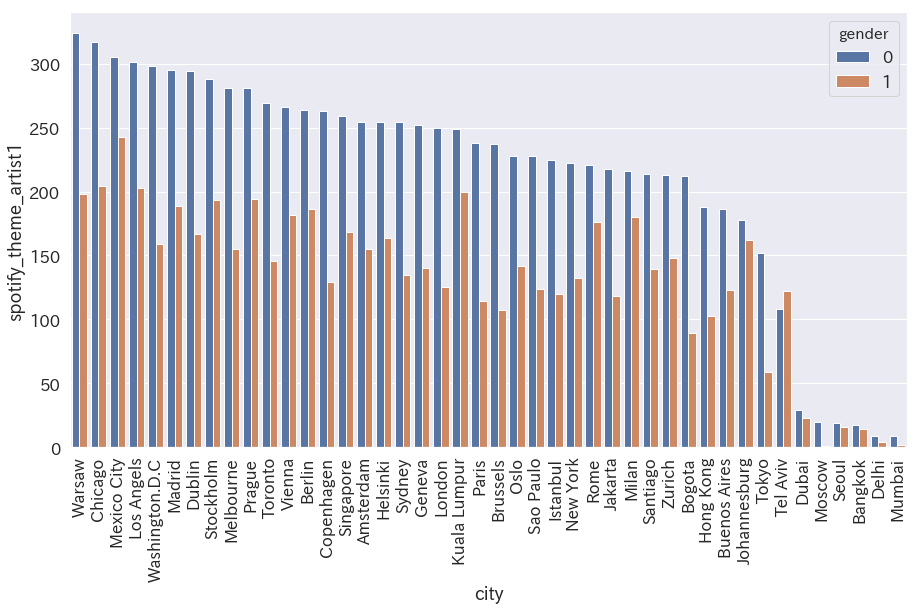

In [27]:
df_spotify = data[data['spotify_theme_artist1'] != ""]
df_spotify = df_spotify.groupby(['city','gender'])['spotify_theme_artist1'].size()
df_spotify = df_spotify.reset_index().sort_values(['spotify_theme_artist1', "city"], ascending=[False, True])
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='spotify_theme_artist1', hue="gender", data=df_spotify)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Drake'),
 Text(0,0,'Ariana Grande'),
 Text(0,0,'Ed Sheeran'),
 Text(0,0,'Lana Del Rey'),
 Text(0,0,'Nicki Minaj'),
 Text(0,0,'Florence + The Machine'),
 Text(0,0,'Cardi B'),
 Text(0,0,'The Chainsmokers'),
 Text(0,0,'Calvin Harris'),
 Text(0,0,'Dua Lipa')]

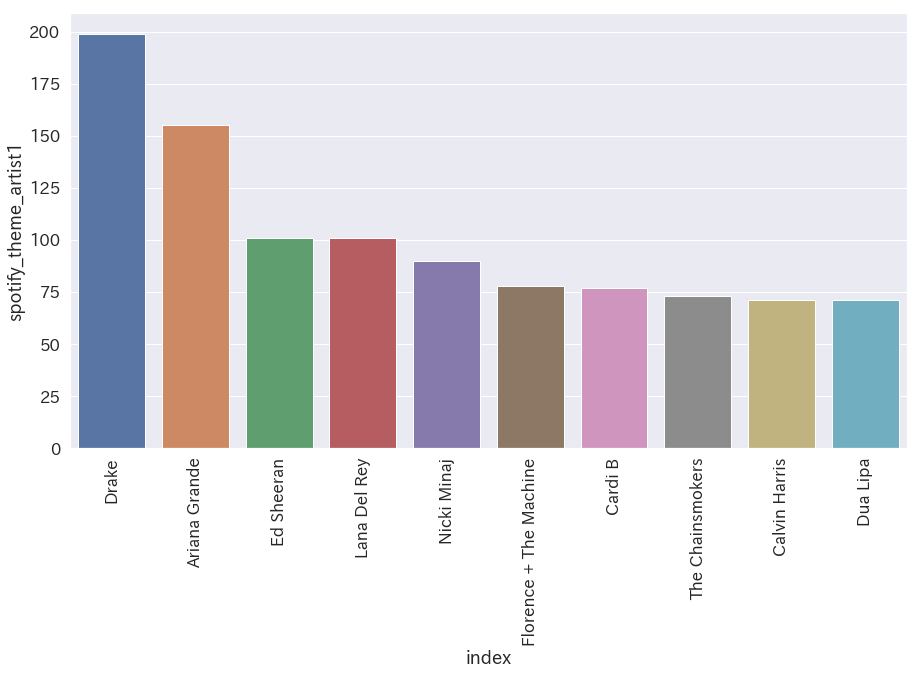

In [28]:
df_spotify_male = data[(data['spotify_theme_artist1'] != "") & (data["gender"] == 0)]
df_spotify_male = df_spotify_male['spotify_theme_artist1'].value_counts()
df_spotify_male = df_spotify_male.reset_index()
df_spotify_male = df_spotify_male[0:10]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='spotify_theme_artist1', data=df_spotify_male)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Drake'),
 Text(0,0,'Post Malone'),
 Text(0,0,'Travis Scott'),
 Text(0,0,'XXXTENTACION'),
 Text(0,0,'Cardi B'),
 Text(0,0,'Arctic Monkeys'),
 Text(0,0,'Ariana Grande'),
 Text(0,0,'Ed Sheeran'),
 Text(0,0,'Kanye West'),
 Text(0,0,'Lana Del Rey')]

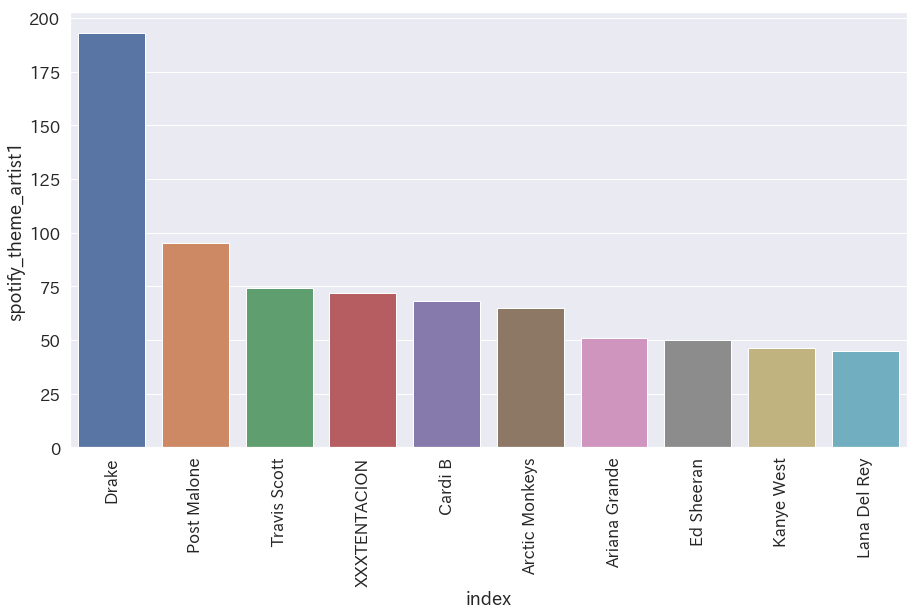

In [29]:
df_spotify_female = data[(data['spotify_theme_artist1'] != "") & (data["gender"] == 1)]
df_spotify_female = df_spotify_female['spotify_theme_artist1'].value_counts()
df_spotify_female = df_spotify_female.reset_index()
df_spotify_female = df_spotify_female[0:10]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='spotify_theme_artist1', data=df_spotify_female)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'The Chainsmokers'),
 Text(0,0,'Ariana Grande'),
 Text(0,0,'Ed Sheeran'),
 Text(0,0,'Drake'),
 Text(0,0,'David Guetta'),
 Text(0,0,'SOPHIE'),
 Text(0,0,'HIRAIDAI'),
 Text(0,0,'Aimyon'),
 Text(0,0,'KIRINJI'),
 Text(0,0,'Jess Glynne')]

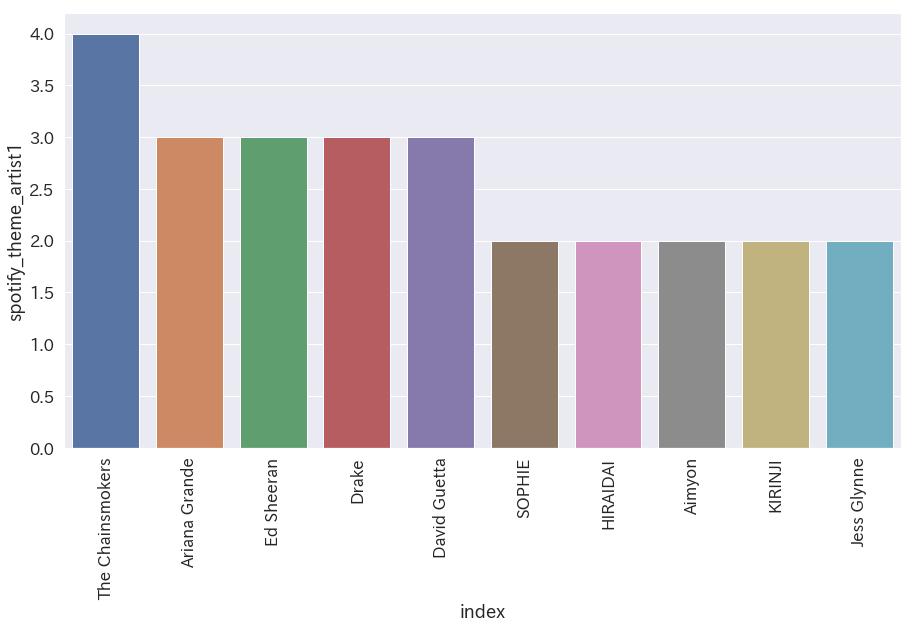

In [30]:
df_spotify_tokyo = data[(data['spotify_theme_artist1'] != "") & (data['city'] == "Tokyo")]
df_spotify_tokyo = df_spotify_tokyo['spotify_theme_artist1'].value_counts()
df_spotify_tokyo = df_spotify_tokyo.reset_index()
df_spotify_tokyo = df_spotify_tokyo[0:10]
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='spotify_theme_artist1', data=df_spotify_tokyo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


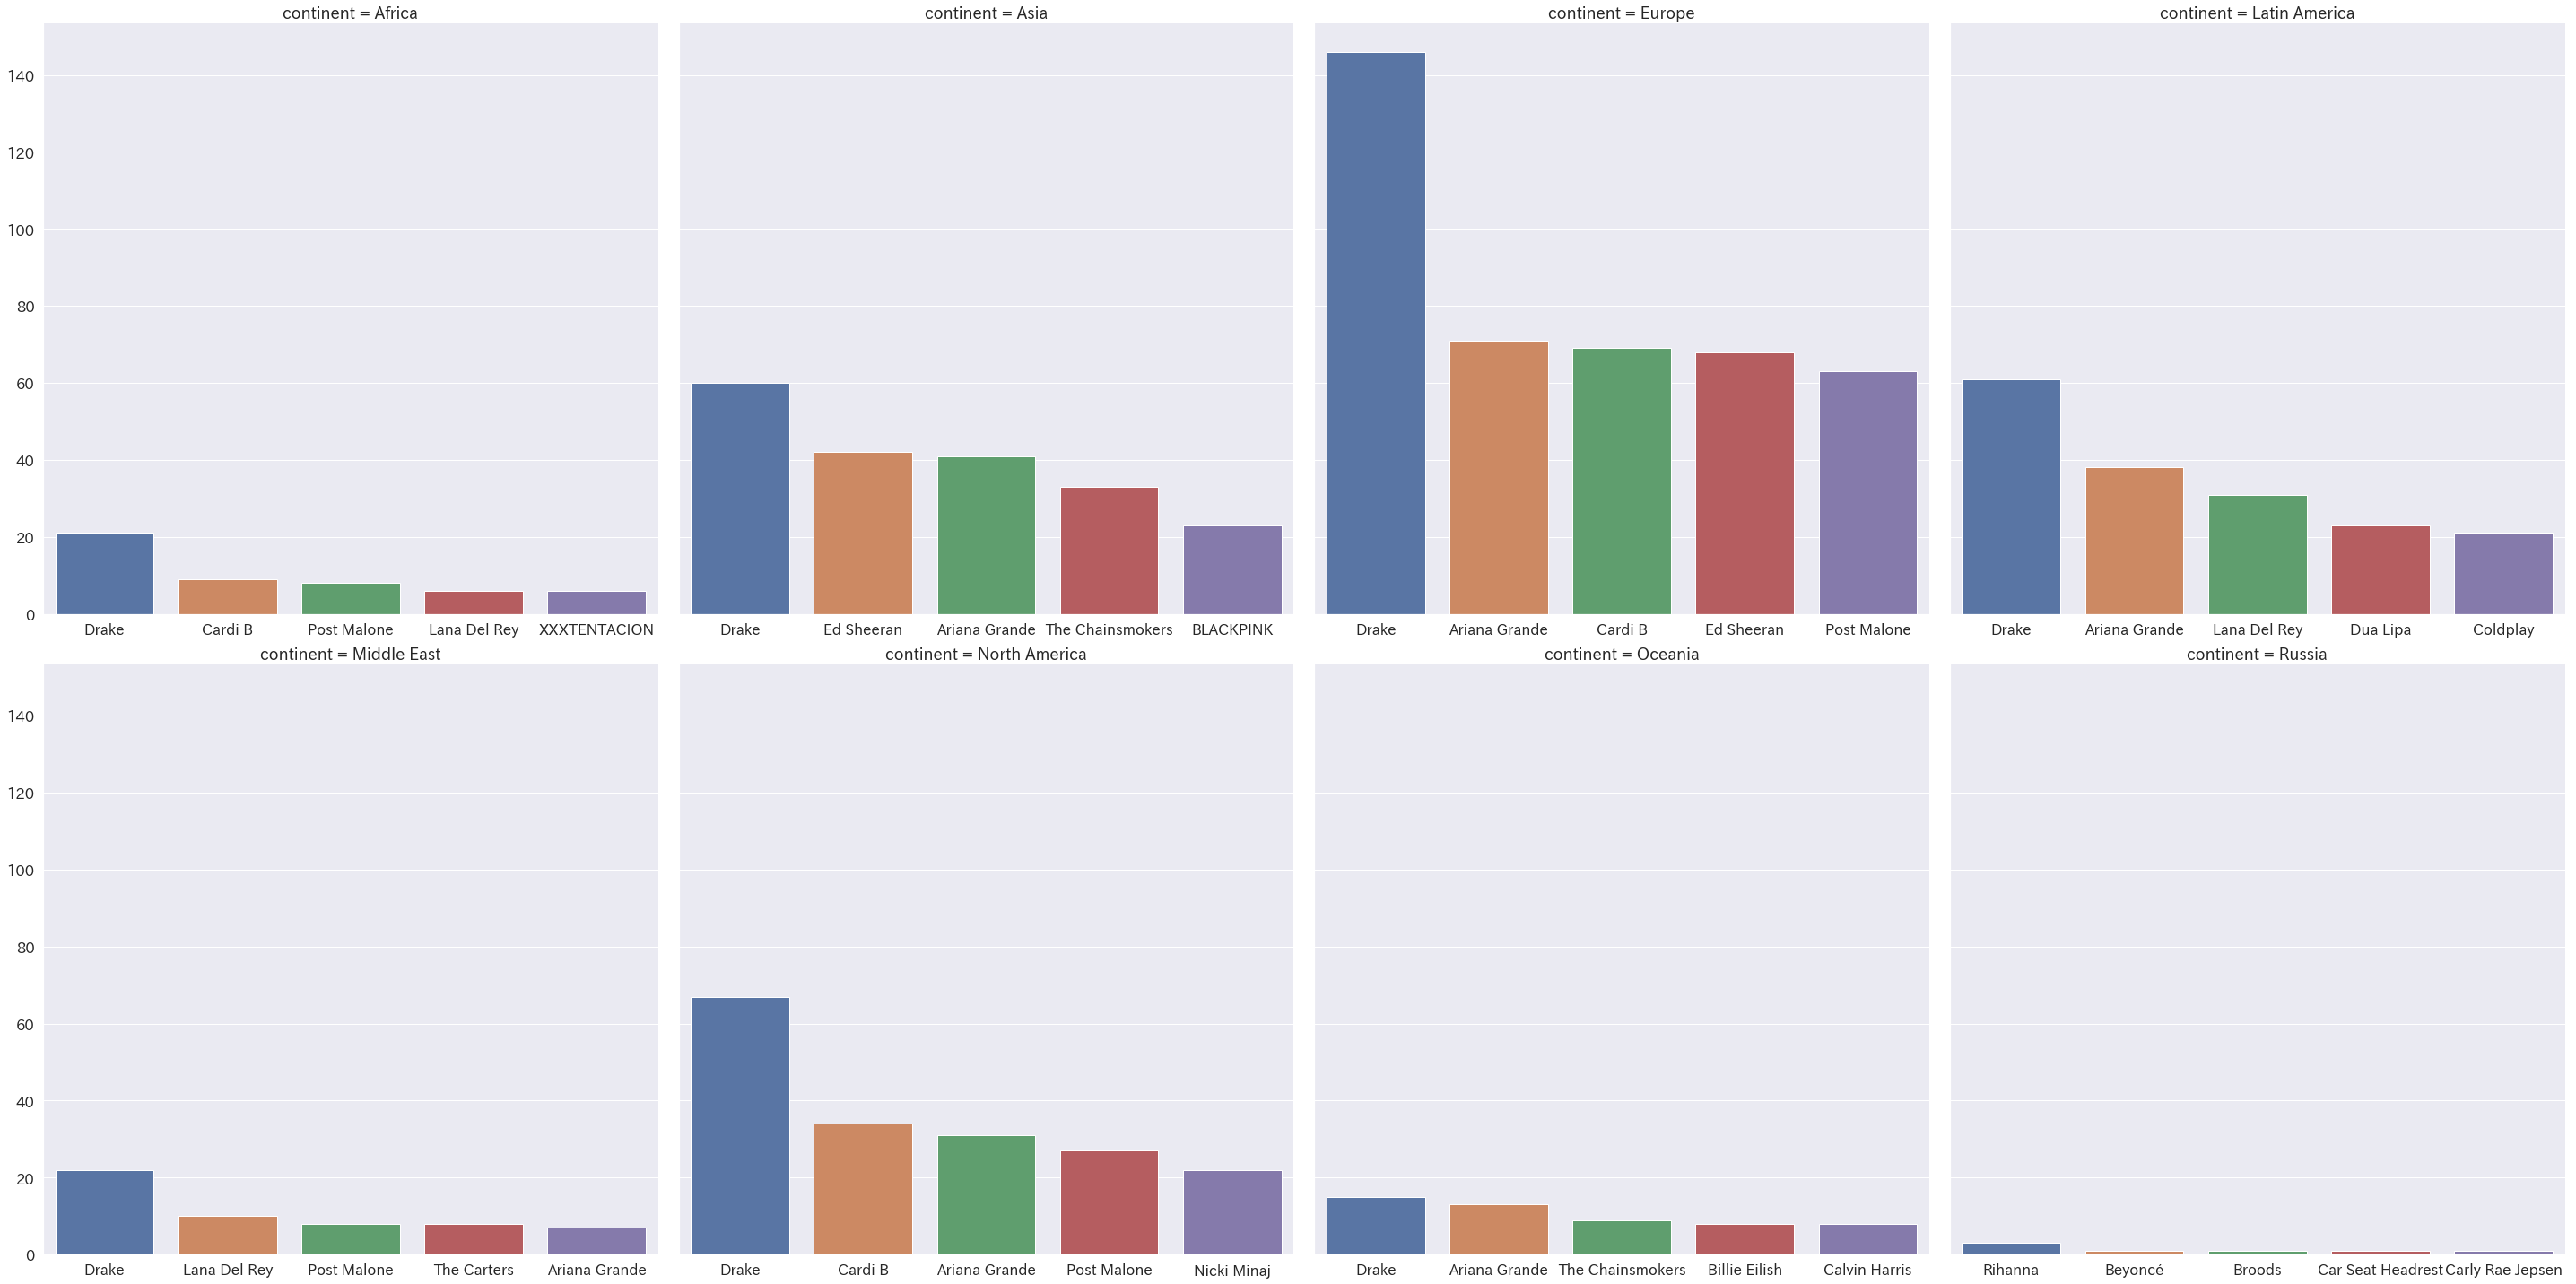

In [31]:
df_spotify_continent = data[data['spotify_theme_artist1'] != ""]
df_spotify_continent = df_spotify_continent.groupby(['continent', 'spotify_theme_artist1'])['continent', 'spotify_theme_artist1'].size()
df_spotify_continent = df_spotify_continent.reset_index().sort_values(["continent", 0], ascending=[True, False])
df_spotify_continent = df_spotify_continent.rename(columns={0: 'count_artist'})
g = sns.FacetGrid(df_spotify_continent, col="continent", size=10, sharex=False, col_wrap=4)

def limit_barplot(data, **kws):
    sns.barplot(data.spotify_theme_artist1[0:5], data.count_artist[0:5])

g.map_dataframe(limit_barplot)

/home/iwata/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


[Text(0,0,'Chicago'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Los Angels'),
 Text(0,0,'New York'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Santiago'),
 Text(0,0,'Delhi'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Singapore'),
 Text(0,0,'London'),
 Text(0,0,'Toronto'),
 Text(0,0,'Dublin'),
 Text(0,0,'Brussels'),
 Text(0,0,'Dubai'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Paris'),
 Text(0,0,'Rome'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Bogota'),
 Text(0,0,'Madrid'),
 Text(0,0,'Sydney'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Berlin'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Vienna'),
 Text(0,0,'Zurich'),
 Text(0,0,'Milan'),
 Text(0,0,'Oslo'),
 Text(0,0,'Prague'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Geneva'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Seoul')]

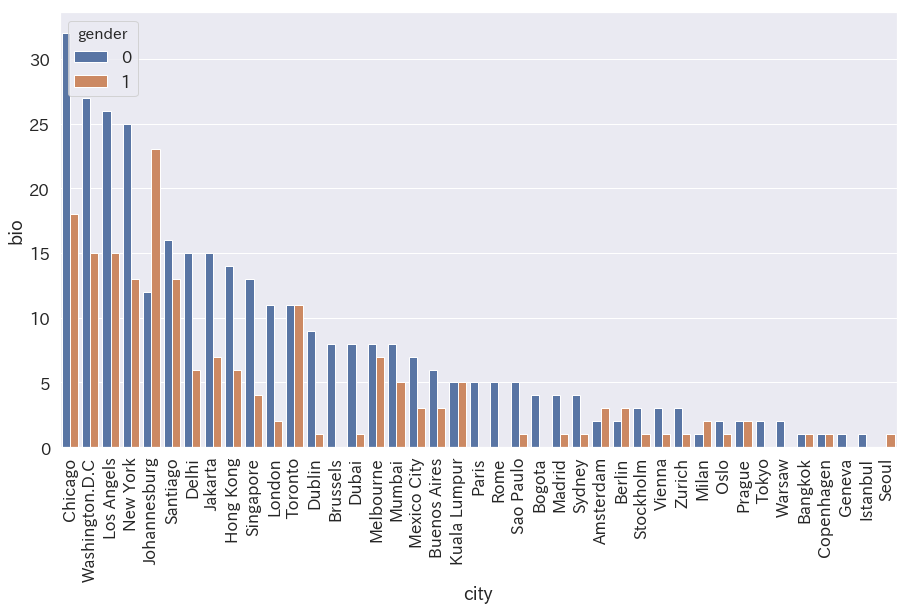

In [32]:
df_bio_zodiac = data[data['bio'].str.contains(r'(?i)\b(Aries|Taurus|Gemini|Cancer|Leo|Virgo|Libra|Scorpio|Sagittarius|Capricorn|Aquarius|Pisces)\b')]
df_bio_zodiac = df_bio_zodiac.groupby(['city', 'gender'])['bio'].size()
df_bio_zodiac = df_bio_zodiac.reset_index().sort_values(["bio", "city"], ascending=[False, True])
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='bio', hue="gender", data=df_bio_zodiac)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


[Text(0,0,'Seoul'),
 Text(0,0,'New York'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Berlin'),
 Text(0,0,'Chicago'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'London'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Paris'),
 Text(0,0,'Zurich'),
 Text(0,0,'Moscow'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Toronto'),
 Text(0,0,'Vienna'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Madrid'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Sydney'),
 Text(0,0,'Santiago'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Oslo'),
 Text(0,0,'Dublin'),
 Text(0,0,'Prague'),
 Text(0,0,'Geneva'),
 Text(0,0,'Rome'),
 Text(0,0,'Singapore'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Brussels'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Milan'),
 Text(0,0,'Delhi'),
 Text(0,0,'Dubai'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Bogota')]

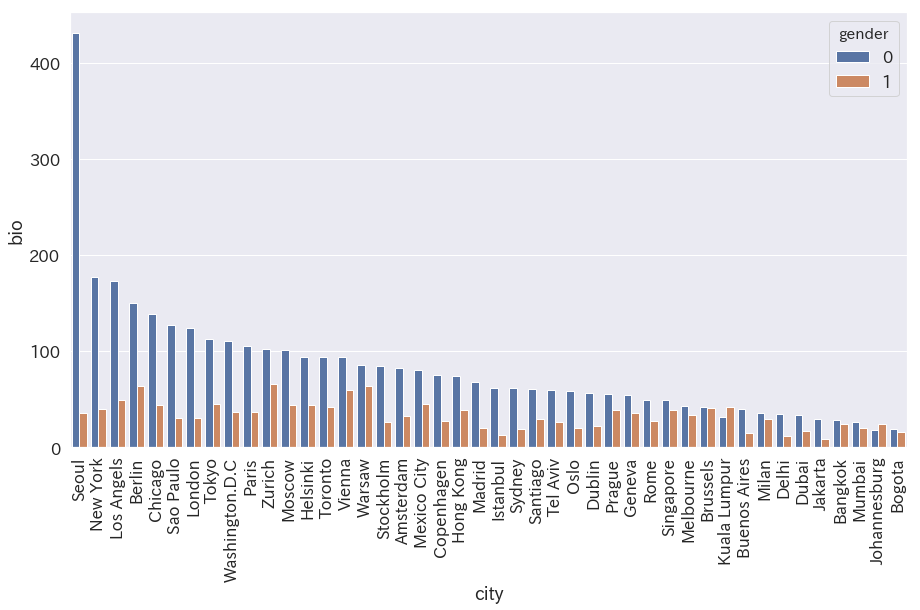

In [33]:
df_height = data[data['bio'].str.contains(r'((?i)[4-6][\.\"\'\’\”\,] ?(1\d|\d)(\W|\s)?|[4-6][\.\"\'\’\”\,]? ?(1\d|\d)?(\W|\s)*(feet|ft)|1[\.\"\'\’\”\,m]?[4-9][0-9](\s|\W|cm|m|$))')]
df_height = df_height.groupby(['city', 'gender'])['bio'].size()
df_height = df_height.reset_index().sort_values(["bio", "city"], ascending=[False, True])
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='bio', hue="gender", data=df_height)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

/home/iwata/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


[Text(0,0,'Santiago'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Madrid'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Chicago'),
 Text(0,0,'Singapore'),
 Text(0,0,'New York'),
 Text(0,0,'London'),
 Text(0,0,'Los Angels'),
 Text(0,0,'Bogota'),
 Text(0,0,'Sydney'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Melbourne'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'Dublin'),
 Text(0,0,'Paris'),
 Text(0,0,'Dubai'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Rome'),
 Text(0,0,'Brussels'),
 Text(0,0,'Geneva'),
 Text(0,0,'Milan'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Prague'),
 Text(0,0,'Toronto'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Delhi'),
 Text(0,0,'Vienna'),
 Text(0,0,'Zurich'),
 Text(0,0,'Berlin'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Oslo'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Moscow'),
 Text(0,0,'Seoul')]

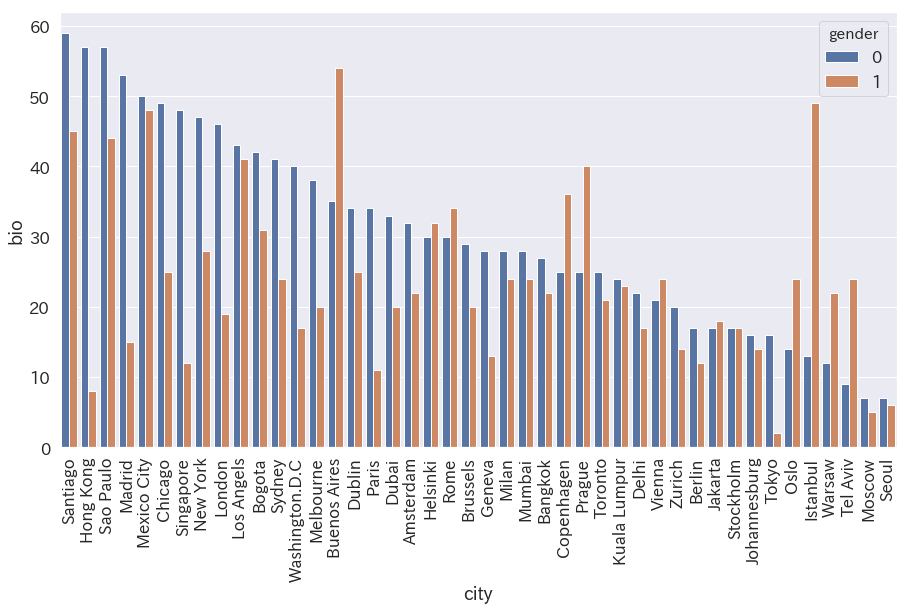

In [34]:
df_bio_instagram = data[data['instagram'].notnull()]
df_bio_instagram = df_bio_instagram[df_bio_instagram['bio'].str.contains(r'((?i)instagram\W?\s?|\binsta\W?\s?\b|\big\W?\s?\b|@)')]
df_bio_instagram = df_bio_instagram.groupby(['city', 'gender'])['bio'].size()
df_bio_instagram = df_bio_instagram.reset_index().sort_values(["gender", "bio"], ascending=[True, False])
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y='bio', hue="gender", data=df_bio_instagram)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0,0,'Los Angels'),
 Text(0,0,'Santiago'),
 Text(0,0,'Madrid'),
 Text(0,0,'Melbourne'),
 Text(0,0,'New York'),
 Text(0,0,'Mexico City'),
 Text(0,0,'Prague'),
 Text(0,0,'Chicago'),
 Text(0,0,'Sydney'),
 Text(0,0,'Toronto'),
 Text(0,0,'Rome'),
 Text(0,0,'Sao Paulo'),
 Text(0,0,'Milan'),
 Text(0,0,'Bogota'),
 Text(0,0,'Buenos Aires'),
 Text(0,0,'London'),
 Text(0,0,'Hong Kong'),
 Text(0,0,'Singapore'),
 Text(0,0,'Amsterdam'),
 Text(0,0,'Washington.D.C'),
 Text(0,0,'Dublin'),
 Text(0,0,'Copenhagen'),
 Text(0,0,'Brussels'),
 Text(0,0,'Berlin'),
 Text(0,0,'Oslo'),
 Text(0,0,'Helsinki'),
 Text(0,0,'Warsaw'),
 Text(0,0,'Paris'),
 Text(0,0,'Vienna'),
 Text(0,0,'Stockholm'),
 Text(0,0,'Mumbai'),
 Text(0,0,'Zurich'),
 Text(0,0,'Moscow'),
 Text(0,0,'Johannesburg'),
 Text(0,0,'Geneva'),
 Text(0,0,'Tel Aviv'),
 Text(0,0,'Kuala Lumpur'),
 Text(0,0,'Delhi'),
 Text(0,0,'Dubai'),
 Text(0,0,'Bangkok'),
 Text(0,0,'Tokyo'),
 Text(0,0,'Istanbul'),
 Text(0,0,'Jakarta'),
 Text(0,0,'Seoul')]

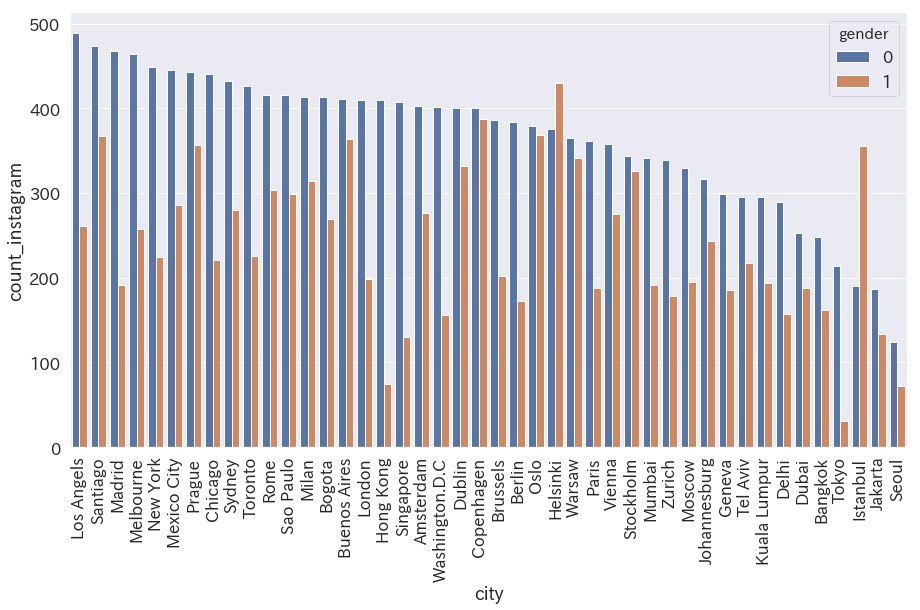

In [35]:
df_instagram_bio_column = pd.merge(df_instagram, df_bio_instagram, on=["city", "gender"])
df_instagram_bio_column.set_index(["city", "gender"], inplace=True)
df_instagram_bio_column = df_instagram_bio_column.sum(axis=1)
df_instagram_bio_column = df_instagram_bio_column.reset_index().sort_values(["gender", 0], ascending=[True, False])
df_instagram_bio_column = df_instagram_bio_column.rename(columns={0: 'count_instagram'})
plt.figure(figsize=(15,8))
ax = sns.barplot(x='city', y="count_instagram", hue="gender", data=df_instagram_bio_column)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)